# Previous Course

## What's the Language Model? OOV problem

### Out of Vocabulary(OOV)

- 如果这个词在句子中出现的次数为零，这个时候我们该如何求概率？
    - 我们常用的解决方法是把给它设一个定值。$Pr(w_0)=constant<Pr(w_1)$
    - 平滑（smooth）。关于平滑法的超链接如下：<http://www.shuang0420.com/2017/03/24/NLP%20%E7%AC%94%E8%AE%B0%20-%20%E5%B9%B3%E6%BB%91%E6%96%B9%E6%B3%95(Smoothing)%E5%B0%8F%E7%BB%93/>

[](http://www.shuang0420.com/2017/03/24/NLP%20%E7%AC%94%E8%AE%B0%20-%20%E5%B9%B3%E6%BB%91%E6%96%B9%E6%B3%95(Smoothing%E5%B0%8F%E7%BB%93/)

### Lamda expression

In [1]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

In [2]:
sorted(numbers)

[-11, -4, -2, 1, 1, 5, 6, 9]

In [3]:
def absolute(number):
    if number < 0:
        return -1 * (number)
    else:
        return number

In [5]:
# 按绝对值排序
sorted(numbers, key=absolute)

[1, 1, -2, -4, 5, 6, 9, -11]

In [9]:
def mod_5(number):
    return number % 5

In [10]:
mod_5(1)

1

In [11]:
sorted(numbers, key=lambda x: x % 5)

[5, 1, -4, 1, 6, -2, 9, -11]

# Problem Sloving: Search Based

## Search Policy

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
city_location = {
    '香港': (114.17, 22.28)
}

- **Input: string -> dict**

In [3]:
test_string = "{name:'澳门', geoCoord:[113.54, 22.19]},"

In [4]:
test_string

"{name:'澳门', geoCoord:[113.54, 22.19]},"

In [5]:
import re

In [6]:
# 定义一个模式
test_pattern = r"name:'\w+'"

In [7]:
# 应用正则表达式
re.findall(pattern=test_pattern, string=test_string)

["name:'澳门'"]

In [8]:
test_pattern2 = r"name:'(\w+)'"

In [9]:
# 如果只想要‘澳门’两个字，可以加一个括弧，可以理解为取出你想要的东西
re.findall(pattern=test_pattern2, string=test_string)

['澳门']

In [10]:
# 提取经纬度
test_pattern3 = r"geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]"  # \也是转义

In [11]:
re.findall(pattern=test_pattern3, string=test_string)

[('113.54', '22.19')]

In [12]:
# 合并提取
pattern = r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]"

In [13]:
re.findall(pattern=pattern, string=test_string)

[('澳门', '113.54', '22.19')]

In [14]:
# 提取上述列表的第一个元素
re.findall(pattern=pattern, string=test_string)[0]

('澳门', '113.54', '22.19')

In [15]:
# 写一个循环，遍历coordination_source
pattern = re.compile(pattern)

for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info:
        continue
        
    # following: we find the city_info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)  # 正则匹配的数字为字符窜，需要将其改为数字
    
    city_location[city] = (long, lat)

In [16]:
city_location

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [17]:
import math

In [18]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.
    
    Parameters
    ----------
    origin: tuple of float
        (lat, long)
    destination: tuple of float
        (lat, long)
    
    Returns
    -------
    distance_in_km: float
    
    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distination(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + 
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * 
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [19]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [20]:
get_geo_distance('上海', '杭州')

153.5185697155768

In [21]:
import networkx as nx

In [22]:
city_graph = nx.Graph()

In [23]:
city_graph.add_nodes_from(list(city_location.keys()))

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [26]:
%matplotlib inline

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\JeremySun\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files

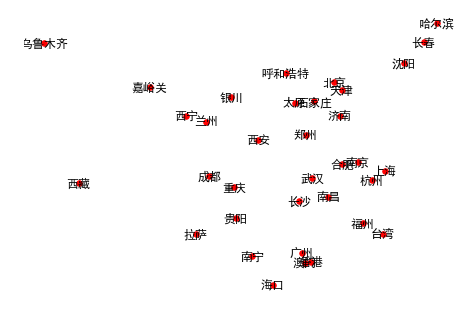

In [27]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [28]:
from collections import defaultdict

In [29]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [30]:
simple_connection_info = defaultdict(list)

In [31]:
simple_connection_info.update(simple_connection_info_src)

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\JeremySun\Anaconda3\lib\site-packages\n

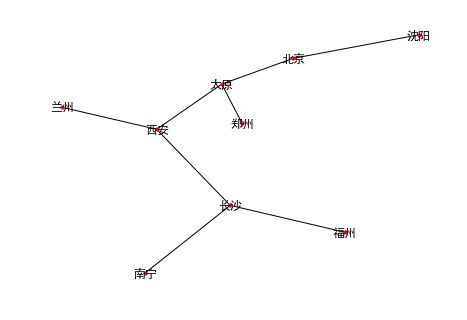

In [32]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

### Breath First Search

- path = pathes.pop(0)这里隐含一个信息——最早扩展的路的节点最少，所以我们现在的方式是按照转乘最少进行扩展。

In [33]:
def search(start, destination, connection_graph):
    pathes = [[start]]
    
    vistied = set()
    
    while pathes:  # if we find existing pathes
        path = pathes.pop(0)  # take out the original city
        frontier = path[-1]  # take out the last city
        
        if frontier in vistied:
            continue
        
        successors = connection_graph[frontier]
        
        for city in successors:
            if city in path:  # eliminate loop
                continue
            
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination:
                return new_path
            
        vistied.add(frontier)

In [34]:
search('兰州', '福州', simple_connection_info)

['兰州', '西安', '长沙', '福州']

In [35]:
search('北京', '福州', simple_connection_info)

['北京', '太原', '西安', '长沙', '福州']

In [36]:
def pretty_print(cities):
    return '->'.join(cities)

In [37]:
pretty_print(search('兰州', '福州', simple_connection_info))

'兰州->西安->长沙->福州'

In [38]:
# only Breath First Search
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        frontier = visited.pop()
        
        if frontier in seen:
            continue

        for successor in graph[frontier]:
            if successor in seen:  # if successor has been seen (解决环问题)
                continue
            print(successor) 
            
            # visited = visited + [successor]  # 我们每次扩展都扩展最新发现的点 -> depth first
            
            visited = [successor] + visited  # 我们每次扩展都先考虑已经发现的老的点 -> breath first
            
            # 所以说，这个扩展顺序其实决定了我们的深度优先还是广度优先
    
        seen.add(frontier)
        
    return seen

In [39]:
bfs(simple_connection_info, '北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

In [40]:
number_graph = defaultdict(list)

In [41]:
number_graph.update({
    1: [2, 3],
    2: [1, 4],
    3: [1, 5],
    4: [2, 6],
    5: [3, 7]
})

In [42]:
bfs(number_graph, 1)

2
3
4
5
6
7


{1, 2, 3, 4, 5, 6, 7}

In [43]:
# 之前我们都是自己进行连接关系的确定，现在我们下一个定义自动确定连接关系
threhold = 300

In [44]:
city_connection = defaultdict(list)

In [45]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2:
            continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threhold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [46]:
city_connection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['成都', '银川', '西宁', '成都', '银川', '西宁'],
             '北京': ['天津', '济南', '天津', '济南', '石家庄', '石家庄'],
             '南京': ['杭州', '合肥', '杭州', '合肥'],
             '南宁': ['海口', '贵阳', '海口', '贵阳'],
             '南昌': ['合肥', '武汉', '合肥', '武汉'],
             '台湾': ['福州', '福州'],
             '合肥': ['济南', '济南', '南京', '南昌', '南京', '南昌'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['济南', '北京', '济南', '北京'],
             '太原': ['呼和浩特', '呼和浩特', '郑州', '石家庄', '郑州', '石家庄'],
             '广州': ['澳门', '长沙', '香港', '澳门', '长沙', '香港'],
             '成都': ['重庆', '拉萨', '西宁', '兰州', '重庆', '拉萨', '西宁', '兰州'],
             '拉萨': ['成都', '成都', '西宁', '西宁'],
             '杭州': ['福州', '福州', '南京', '上海', '南京', '上海'],
             '武汉': ['长沙', '长沙', '郑州', '南昌', '郑州', '南昌'],
             '沈阳': ['长春', '长春'],
             '济南': ['天津', '天津', '合肥', '北京', '石家庄', '合肥', '北京', '石家庄'],
             '海口': ['南宁', '南宁'],
         

In [47]:
city_with_road = nx.Graph(city_connection)

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\JeremySun\Anaconda3\lib\site-packages\n

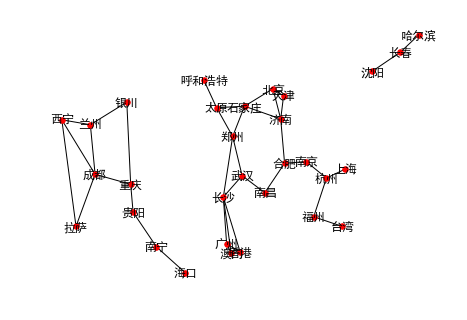

In [48]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [49]:
search('北京', '南京', city_connection)

['北京', '济南', '合肥', '南京']

In [50]:
search('长沙', '北京', city_connection)

['长沙', '郑州', '石家庄', '北京']

### Depth First Search

In [51]:
# only Depth First Search
def dfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        frontier = visited.pop()
        
        if frontier in seen:
            continue

        for successor in graph[frontier]:
            if successor in seen:  # if successor has been seen (解决环问题)
                continue
            print(successor) 
            
            visited = visited + [successor]  # 我们每次扩展都扩展最新发现的点 -> depth first
            
            # visited = [successor] + visited  # 我们每次扩展都先考虑已经发现的老的点 -> breath first
            
            # 所以说，这个扩展顺序其实决定了我们的深度优先还是广度优先
    
        seen.add(frontier)
        
    return seen

- 现在换一种排序方式

In [52]:
def sort_search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    vistied = set()
    
    while pathes:  # if we find existing pathes
        path = pathes.pop(0)  # take out the original city
        frontier = path[-1]  # take out the last city
        
        if frontier in vistied:
            continue
        
        successors = connection_graph[frontier]
        
        for city in successors:
            if city in path:  # eliminate loop
                continue
            
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination:
                return new_path
            
        vistied.add(frontier)
        
        pathes = sort_candidate(pathes)  # 这里我们加一个排序函数来对搜索策略进行控制

In [53]:
sort_search('兰州', '福州', simple_connection_info, lambda n: n)  # 先不改变排序函数

['兰州', '西安', '长沙', '福州']

In [54]:
# 最小站数优先
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [55]:
sort_search('兰州', '福州', simple_connection_info, sort_candidate=transfer_stations_first)

['兰州', '西安', '长沙', '福州']

In [56]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [57]:
sort_search('兰州', '福州', simple_connection_info, sort_candidate=transfer_as_much_possible)

['兰州', '西安', '长沙', '福州']

In [58]:
# 定义最短距离优先
def shortest_path_first(pathes):
    
    if len(pathes) < 1:
        return pathes
    
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
        
        return distance
            
    return sorted(pathes, key=get_path_distance)

In [59]:
sort_search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

- 感受不同的规则

In [60]:
pretty_print(sort_search('北京', '长沙', city_connection, sort_candidate=transfer_stations_first))

'北京->石家庄->郑州->长沙'

In [61]:
pretty_print(sort_search('北京', '长沙', city_connection, sort_candidate=transfer_as_much_possible))

'北京->天津->济南->合肥->南昌->武汉->长沙'

### Assignment

- 考察以下内容
    - 网络爬虫 + 正则
    - 数据处理
    - 算法应用能力

In [62]:
import requests

In [63]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [64]:
response = requests.get(url)

In [72]:
import re

In [73]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [74]:
pattern = re.compile(what_we_want)

In [75]:
likes = pattern.findall(response.text)

In [76]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page
movie.douban.com/subject/1866475/?from=subject-page


## Mathematical ro Analytic Based 

- 人工想出函数

<img src="Mathematic or Analytic Based.png", width=600, height=600>

## Machine Learning (deep learning) Based

### First-Method: Random generation: get best k and best b

- 让计算机利用已有数据自动生成上述函数

In [1]:
from sklearn.datasets import load_boston

In [3]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

In [2]:
data = load_boston()

In [3]:
x, y = data['data'], data['target']

In [4]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
y[0]

24.0

In [6]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
# 打印所有的x1，即CRIM
x[:, 0]  # 取二维数组中第1维的所有数据

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

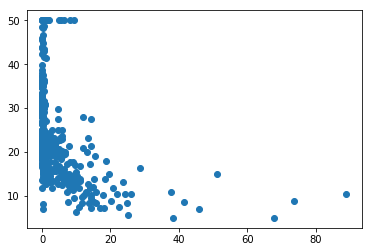

In [9]:
plt.scatter(x[:, 0], y)  # 可以看出犯罪率越低房价越高

In [11]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)  # x[:, 5]表示RM，即average number of rooms per dwelling

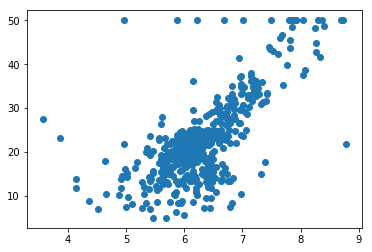

In [18]:
draw_rm_and_price()

- 如何根据上述数据自动的生成函数

In [12]:
# 现在我们随机生成一个函数f(x) = kx + b
def price(rm, k, b):
    """
    f(x) = k * x + b
    """
    return k * rm + b

In [13]:
import random
import matplotlib as mpl

In [14]:
mpl.rcParams["font.sans-serif"] = ["simHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [16]:
x_rm = x[:, 5]  # average number of rooms per dwelling

Text(0.5,1,'第1幅随机生成的price与真实的price的对比图')

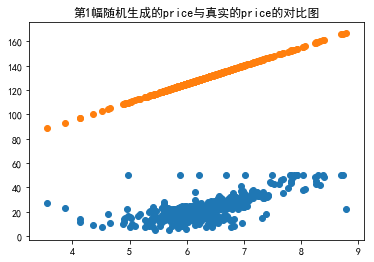

In [35]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
# 画出第1幅随机生成的price与真实的price的对比图
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)
plt.title("第1幅随机生成的price与真实的price的对比图")

Text(0.5,1,'第2幅随机生成的price与真实的price的对比图')

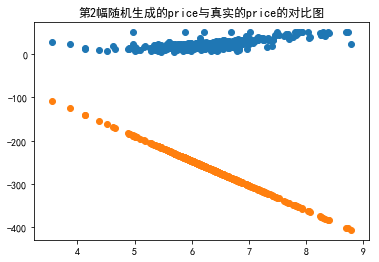

In [33]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
# 画出第2幅随机生成的price与真实的price的对比图
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)
plt.title("第2幅随机生成的price与真实的price的对比图")

### Loss Function

- 由此就生成了两个随机拟合函数，我们该如何评价哪个更好？

<img src="Evaluate2.png", width=600, height=600>

- 显然，我们希望两点间的距离越小越好，最好重合上了。在机器学习的术语里我们把这个称之为**损失**。损失越大越不好，损失越小越好。**我们可以理解为实际点与预测点之间粉色的线就是这次计算所损失掉得值**。衡量这一次预测好坏的值我们称之为损失值。定义为：

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})} ^ 2 $$

In [15]:
def loss(y, y_hat):  # to evaluate the performance
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))  # 加i表示每一个

In [45]:
# for example
example_y = [1, 1, 1]
example_y_hat = [1, 2, 4]

In [46]:
loss(example_y, example_y_hat)

3.3333333333333335

In [54]:
# 尝试生成多次k和b，选择最优loss
trying_times = 100

min_loss = float("inf")  # 正无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("Get best_k: {}, best_b: {}, and the loss is: {}".format(best_k, best_b, min_loss))

Get best_k: -27, best_b: -1, and the loss is: 38018.931230164024
Get best_k: 9, best_b: -4, and the loss is: 945.3407138478257
Get best_k: 19, best_b: -95, and the loss is: 95.38558965810276


Text(0.5,1,'上述随机生成最优的price与真实的price的对比图')

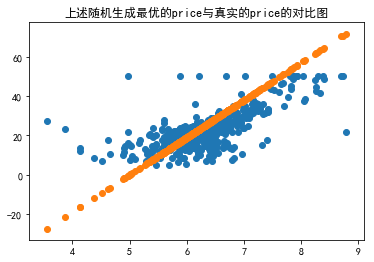

In [55]:
x_rm = x[:, 5]
k = 19
b = -95
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]  # 还是一个循环
# 画出上述随机生成的最优price与真实的price的对比图
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)
plt.title("上述随机生成最优的price与真实的price的对比图")

- 可以看出这个拟合线已经比较吻合了，但Loss仍比较大，进行简单的优化，即更多次的trying_times。

In [56]:
# 尝试生成多次k和b，选择最优loss
trying_times = 1000

min_loss = float("inf")  # 正无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("Get best_k: {}, best_b: {}, and the loss is: {}".format(best_k, best_b, min_loss))

Get best_k: -65, best_b: -70, and the loss is: 253784.16110983203
Get best_k: 64, best_b: 28, and the loss is: 167734.5510413278
Get best_k: 31, best_b: 40, and the loss is: 45347.26569993481
Get best_k: 44, best_b: -46, and the loss is: 43903.936200379474
Get best_k: 40, best_b: -48, and the loss is: 33221.61843320159
Get best_k: -14, best_b: -8, and the loss is: 14352.99796286957
Get best_k: -19, best_b: 78, and the loss is: 4521.129557247033
Get best_k: 16, best_b: -26, and the loss is: 2773.263652237153
Get best_k: 13, best_b: -72, and the loss is: 215.76092123122535
Get best_k: 14, best_b: -65, and the loss is: 55.62435496442685
Get best_k: 5, best_b: -7, and the loss is: 55.46476319169961


- 可以发现已经有55左右的loss出现

Text(0.5,1,'上述随机生成最优的price与真实的price的对比图')

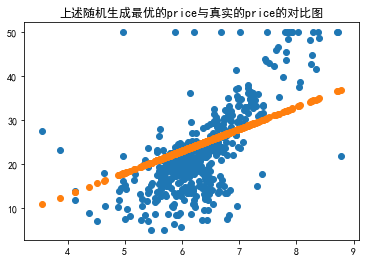

In [57]:
x_rm = x[:, 5]
k = 5
b = -7
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
# 画出上述随机生成的最优price与真实的price的对比图
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)
plt.title("上述随机生成最优的price与真实的price的对比图")

- 继续增大trying_times

In [58]:
# 尝试生成多次k和b，选择最优loss
trying_times = 10000

min_loss = float("inf")  # 正无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("Get best_k: {}, best_b: {}, and the loss is: {}".format(best_k, best_b, min_loss))

Get best_k: -62, best_b: 47, and the loss is: 135890.95953333605
Get best_k: -54, best_b: 45, and the loss is: 102433.00337757314
Get best_k: 52, best_b: -76, and the loss is: 53056.6354337708
Get best_k: 23, best_b: 42, and the loss is: 27039.286843998034
Get best_k: -14, best_b: -50, and the loss is: 26072.483733620546
Get best_k: 34, best_b: -52, and the loss is: 19710.289795913035
Get best_k: -9, best_b: 93, and the loss is: 398.4125391442688
Get best_k: 14, best_b: -74, and the loss is: 128.4870031857708
Get best_k: 7, best_b: -14, and the loss is: 101.42384921541498
Get best_k: 9, best_b: -32, and the loss is: 47.722136772727254
Get best_k: 9, best_b: -33, and the loss is: 44.66433044861659
Get best_k: 8, best_b: -28, and the loss is: 44.26439962055332


- 可以看出loss已经稳定在44左右，较最初拟合时提升明显。

Text(0.5,1,'上述随机生成最优的price与真实的price的对比图')

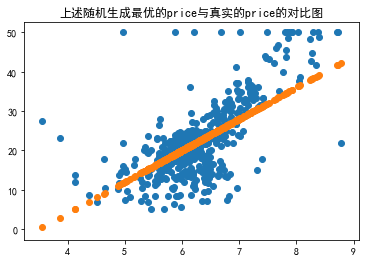

In [59]:
x_rm = x[:, 5]
k = 8
b = -28
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
# 画出上述随机生成的最优price与真实的price的对比图
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)
plt.title("上述随机生成最优的price与真实的price的对比图")

In [62]:
# 重新设置k，b的随机范围
random.random() * 20000 - 10000

-7055.039651721832

In [22]:
# 尝试生成多次k和b，选择最优loss
trying_times = 1000

min_loss = float("inf")  # 正无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("When time is: {}, get best_k: {}, best_b: {}, and the loss is: {}".format(i, best_k, best_b, min_loss))

When time is: 0, get best_k: -73.66570743149437, best_b: 92.26964914009204, and the loss is: 158044.8689635156
When time is: 1, get best_k: 75.48735956393332, best_b: -64.19655692808585, and the loss is: 152511.5385673939
When time is: 2, get best_k: -10.136314192306983, best_b: 34.44288672925131, and the loss is: 2908.4648873128685
When time is: 15, get best_k: -8.213353474107123, best_b: 37.52610300772403, and the loss is: 1532.6863157541952
When time is: 73, get best_k: -5.162521018783821, best_b: 80.81178297799124, and the loss is: 811.2712439334819
When time is: 104, get best_k: -12.978081068427755, best_b: 86.7730275633125, and the loss is: 583.867764950865
When time is: 140, get best_k: -12.154664941810367, best_b: 93.37165354844751, and the loss is: 297.0140384788095
When time is: 154, get best_k: 2.8090973028652257, best_b: 7.6830436790348955, and the loss is: 70.976851412741
When time is: 193, get best_k: 11.39738749461688, best_b: -50.82863495074781, and the loss is: 49.1996

- 目前的loss在46左右，在这个模型里已经接近天花板了。其次这是运行了10000次后的结果，显然太慢了！那么我们有什么方法能让这个loss减小的更快呢？
- **可以看出在这1000里面更新了11步。**

### 2nd-Method: Direction Adjusting

In [21]:
# 尝试生成多次k和b，选择最优loss
trying_times = 2000

min_loss = float("inf")  # 正无穷

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction; second element: b's change direction
    (+1, +1),
    (-1, -1),
    (-1, +1)
]
# 我们按照上述方向随机调整k和b的方向，如果发现沿某方向调整后loss变小了，我们就继续沿着这个方向进行调整

next_direction = random.choice(direction)

scalar = 0.1  # 学习率

update_time = 0  # 控制更新的打印次数

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:  # performance become better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction  # 如果沿着当前这个方向效果好，则把当前这个方向设定为下一步的方向
        update_time += 1
        
        if update_time % 10 == 0:
            print("When time is: {}, get best_k: {}, best_b: {}, and the loss is: {}".format(i, best_k, best_b, min_loss))
        
    else:
        next_direction = random.choice(direction)  # 如果效果没有变好，则我们再随机选一个方向。（这里可以做优化）

When time is: 9, get best_k: 9.983122483167467, best_b: 30.319742981897875, and the loss is: 5018.0705374896825
When time is: 19, get best_k: 8.98312248316747, best_b: 29.31974298189786, and the loss is: 4043.2310881878198
When time is: 29, get best_k: 7.983122483167474, best_b: 28.319742981897846, and the loss is: 3175.508825632994
When time is: 39, get best_k: 6.983122483167477, best_b: 27.319742981897832, and the loss is: 2414.903749825198
When time is: 49, get best_k: 5.983122483167481, best_b: 26.319742981897818, and the loss is: 1761.4158607644417
When time is: 59, get best_k: 4.9831224831674845, best_b: 25.319742981897804, and the loss is: 1215.0451584507223
When time is: 69, get best_k: 3.9831224831674876, best_b: 24.31974298189779, and the loss is: 775.7916428840363
When time is: 79, get best_k: 2.9831224831674867, best_b: 23.319742981897775, and the loss is: 443.6553140643852
When time is: 89, get best_k: 1.9831224831674858, best_b: 22.31974298189776, and the loss is: 218.636

- **在我们加入方向的选择之后，loss一直在逐步变小，但在更新了500多次后不再更新了。**
<br/><br/>
- **如果我们想要得到更快的更新，在更短的时间内得到更好的结果，我们需要做这么一件事情：找对改变的方向。那么问题来了，如何找对这个方向？**
<br/><br/>
- **在2nd-Method中，我们让它沿着对的方向继续走。换句话说，我们是在监督它让它变化，而不是让它随便走。做好了之后给它更多的正反馈，让它接着走，这个过程很像一个学习过程一个，在机器学习里我们把这个称之为监督学习(Supervise Learning)。**

### Derivative

- **上述代码可以在else: next_direction = random.choice(direction)进行优化。在该方向效果不好的情况下，我们让它继续选择一个好的方向。由此，引出导数。在一维空间我们称之为导数，在多维空间称之为梯度。**
    - 我们的目标是为了让loss变得更小，把$f(x)=kx+b$带入到loss中并展开将会得到一个一元二次方程。我们的目标就是求一组k和b让整个loss最小。我们可以把loss看做是k和b的函数$loss(k,b)$，具体如下：
    - $$ loss(k,b)=\frac{1}{n} \sum{(y_i - \hat{y_i})} ^ 2 = \frac{1}{n} \sum{(y_i - (kx_i+b))} ^ 2$$
    - 由于$n$和$y_i$都是已知的，不妨用$c_0$和$c_1$代替，$c_0$、$c_1$为常数。故上式继续写为：
    - $$ \frac{1}{n} \sum{(y_i - (kx_i+b))} ^ 2 = \frac{1}{c_0} \sum{(c_1 - (kx_i+b))} ^ 2$$
    - 展开
    - $$\frac{1}{c_0} \sum{(c_1^2 - k^2x_i^2 - 2kbx_i - b^2)}$$
    - 我们可以把上式看成是$k$和$b$的二元二次方程$loss(k,b)$。而且，随着$k$的变化，$loss$是一个二次曲线。

<img src="Derivative.png", width=600, height=600>

- 那么$k$为什么应该沿着梯度的反方向进行变化呢？
<img src="Direction.png", width=600, height=600>
- 那我们为什么不直接用$loss$对$k$求偏导让导数值等于0求出k呢？因为我们在后期要拟合的函数远远比$y=kx+b$复杂得多。对于很多复杂函数的导数是求不出数值解的，计算机无法进行直接求解。所以我们才用了最笨的方法，一点一点的进行梯度下降来找这个局部最优解。
<img src="Summary.png", width=600, height=600>

- 此前我们已经定义了函数$loss()$，现在我们实现一下这个$loss$对$k$和$b$的偏导。即
- $$\frac{\partial{loss}}{\partial{k}} 和 \frac{\partial{loss}}{\partial{b}}$$

- $$loss(k,b) = \frac{1}{n} \sum{(y_i - (kx_i+b))} ^ 2$$
- $$\frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i-(kx_i+b))}x_i=-\frac{2}{n}\sum{(y_i-\hat{y_i})x_i}$$
- 同理
- $$\frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum{(y_i-(kx_i+b))}=-\frac{2}{n}\sum{(y_i-\hat{y_i})}$$

In [36]:
# 求k的偏导
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [37]:
# 求b的偏导
def partial_b(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [48]:
# 利用梯度优化2.3.3的代码
trying_times = 2000

min_loss = float("inf")

# Initialization（初始化问题）
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("When time is: {}, get best_k: {} best_b: {}, and the loss is: {}".format(i, current_k, current_b, min_loss))
    
    k_gradient = partial_k(x_rm, y, price_by_k_and_b)  # 注意是x_rm而不是x
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is: 0, get best_k: 57.5200927644693 best_b: -35.82557001442031, and the loss is: 93089.0767997171
When time is: 50, get best_k: 41.641291317484274 best_b: -38.320744114280025, and the loss is: 40904.678785797696
When time is: 100, get best_k: 31.118654974141204 best_b: -39.97390203248572, and the loss is: 17988.095559445264
When time is: 150, get best_k: 24.145448090861937 best_b: -41.069071771777146, and the loss is: 7924.3636718743655
When time is: 200, get best_k: 19.52438108005264 best_b: -41.794473325192506, and the loss is: 3504.913352173471
When time is: 250, get best_k: 16.46203274495085 best_b: -42.274836527244865, and the loss is: 1564.1281611573936
When time is: 300, get best_k: 14.43261784362745 best_b: -42.59281748351693, and the loss is: 711.839485840318
When time is: 350, get best_k: 13.087708426641772 best_b: -42.80319083406628, and the loss is: 337.5599820800716
When time is: 400, get best_k: 12.196407872578327 best_b: -42.94225469833784, and the loss is: 173

- 可以看出，loss的下降速率明显加快，仅需要600次左右的迭代，loss值就从最高的98039降至44。

Text(0.5,1,'上述最优的price与真实的price的对比图')

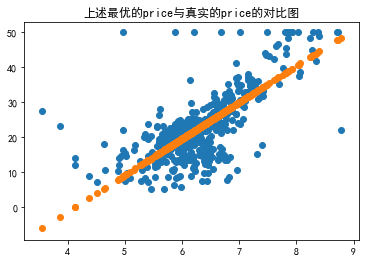

In [49]:
x_rm = x[:, 5]
k = 10.440723654534745
b = -43.18567373827614
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)
plt.title("上述最优的price与真实的price的对比图")

- loss的改善程度一般。我们把想你拟合的函数的复杂程度称为**模型的复杂度**。上面y轴50左右的异常点我们把它们称为**Outlier(离群值)**。这些离群点会影响loss值，需要删除掉。
- 正则化（Regularization）。我们为了使a不那么大，可以选择使用正则化。
<img src="Regularization.png", width=600, height=600>